# Mia Tarantola - Gradient Descent

## Introduction

We are looking at the use of gradient descent for optimization and the logistic loss problem. In this assignment I implement gradient descent for logistic regression, implement stochastic gradient descent and perform several experiments that test the limits of the algorithms

__[link to gradient descent code](https://github.com/miatarantola/miatarantola.github.io/blob/main/posts/Gradient%20Descent%20Blog%20Post/gradient_descent.py)__

## Importing Modules

In [1]:
import importlib
import gradient_descent
from gradient_descent import LogisticRegression 

%load_ext autoreload
%autoreload 2

from sklearn.datasets import make_blobs, make_circles
from matplotlib import pyplot as plt
import numpy as np
np.seterr(all='ignore') 

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# Gradient Descent

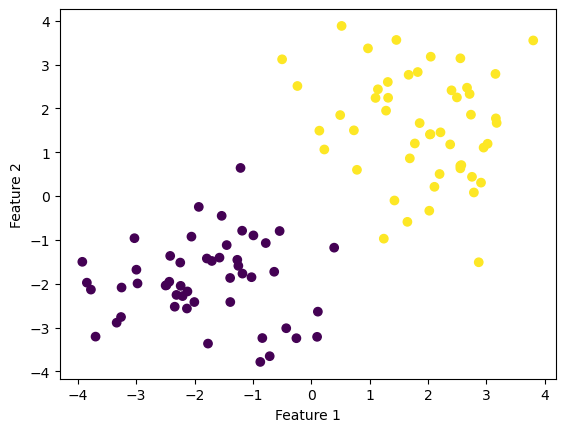

In [2]:
np.random.seed(8674)

n = 100
p_features = 3

X1, y1 = make_blobs(n_samples = 100, n_features = p_features-1,centers=[(-1.7,-1.7),(1.7,1.7)])

fig1 = plt.scatter(X1[:,0], X1[:,1], c = y1)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

In [3]:
LR1 = LogisticRegression()
LR1.fit(X1, y1, alpha = 0.1, max_epochs = 1000)

The fit method begins with generating a random wight vector with size X_features+1. We then add a column of zeros to X to create our X_ array. We set our initial previous loss to infinity so it is guaranteed to update after the first epoch. Then, while our loss has not converged or we have not reached the maximum number of epochs, do the following:

> -  update w by $w -= \alpha* \nabla f(X_{})$
> - calculate the loss of the current state
> - update the loss history and score history
> - set the previous loss = new loss

 * the loss, predict, score and sigmoid functions were adpated from the lectured notes and perceptron blog post

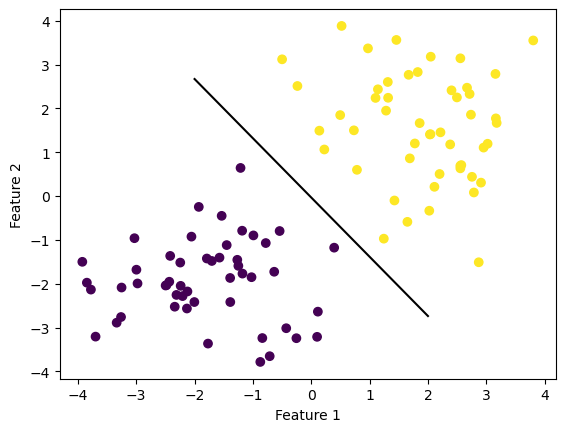

In [4]:
def draw_line(w, x_min, x_max):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]

  plt.plot(x, y, color = "black")

fig1 = plt.scatter(X1[:,0], X1[:,1], c = y1)
fig1 = draw_line(LR1.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")



In [5]:
print(LR1.loss_history[-3])
print(LR1.score_history[-1])

0.011075715117632856
1.0


We can see that this line is a good separator as our loss is small and our score is 1.

## Stochastic Descent

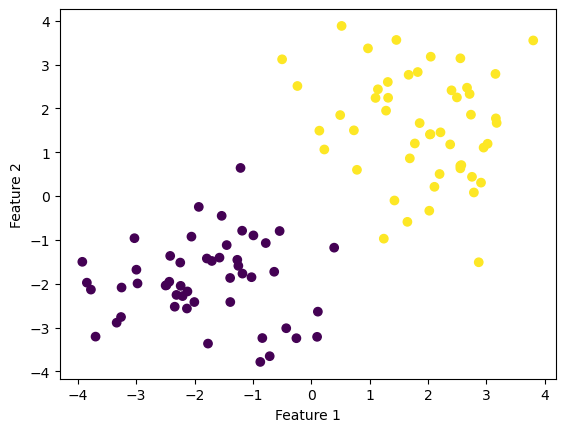

In [6]:
np.random.seed(8674)

X2, y2 = make_blobs(n_samples = 100, n_features = p_features-1,centers=[(-1.7,-1.7),(1.7,1.7)])

fig2 = plt.scatter(X2[:,0], X2[:,1], c = y2)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

In [7]:
LR2 = LogisticRegression()
LR2.fit_stochastic(X2, y2, alpha = 0.1, max_epochs = 1000, batch_size = 15)

The Stochastic fit function beginns similiarly to the original gradient descent function:
> - create X_
> - generate random weight vector of size features+1
> - set previous loss = infinity

Then we have to iterate thrugh the following for the number of max epochs or until the loss converges:

> - shuffle the points randomly
> - pick the first random k points and update the weights vector using the stochastic gradient
> - pick the next set of random points and repeat
> - update the loss and score history 
> - reshuffle the points randomly and iterate again

> - the gradient function is the same as the original one, we are just inputting a subset of X_ and y_ into the function repeatedly


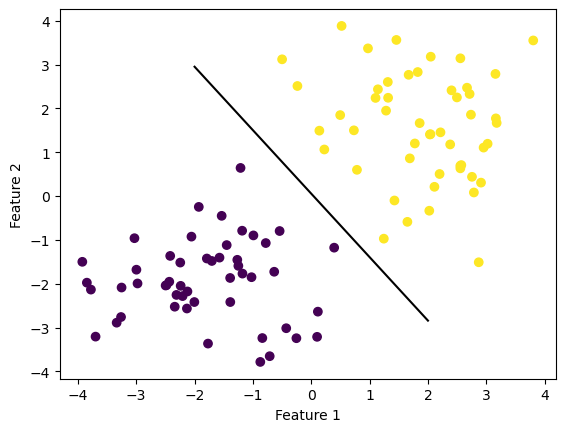

In [8]:
fig2 = plt.scatter(X2[:,0], X2[:,1], c = y2)
fig2 = draw_line(LR2.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")


In [9]:
print(LR2.loss_history[-3])
print(LR2.loss_history[-2])
print(LR2.loss_history[-1])
print(LR2.score_history[-1])


0.0033704921863074765
0.003368276616639715
0.0033660810616696095
1.0


This is a good separator as our loss is close to 0 and our score is close to 1

## Comparing methods

In [ ]:
LR = LogisticRegression()
LR.fit_stochastic(X2, y2, 
                  max_epochs = 10000, 
             
                  batch_size = 10, 
                  alpha = .05) 

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient (a=0.05)")

LR = LogisticRegression()
LR.fit_stochastic(X2, y2, 
                  max_epochs = 10000, 
                  batch_size = 10, 
                  alpha = .1)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient a = .1")

LR = LogisticRegression()
LR.fit(X2, y2, alpha = .05, max_epochs = 10000)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "gradient")

plt.loglog()

legend = plt.legend() 

For these settings, we can see that the stochastic methods are performing much better than the regular gradient descent method. All three methods have a smooth decline in loss, but the stochastic gradient seems to have had the fastest decline. I believe the the gradient methods would need more epochs to find a better solution.

## Experiment: alpha is too large

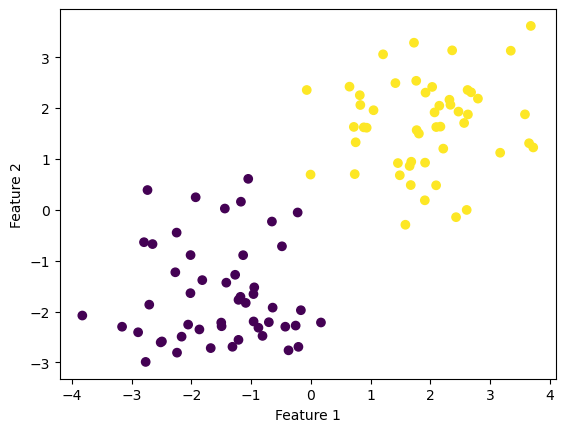

In [11]:
np.random.seed(4001)

n = 100
p_features = 3

X3, y3 = make_blobs(n_samples = 100, n_features = p_features-1,centers=[(-1.7,-1.7),(1.7,1.7)])

fig1 = plt.scatter(X3[:,0], X3[:,1], c = y3)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

In [13]:
#alpha is too large
LR3 = LogisticRegression()
LR3.fit(X3, y3, alpha = 200, max_epochs = 10000)

#alpha is a normal value
LR5 = LogisticRegression()
LR5.fit(X3, y3, alpha = .01, max_epochs = 10000)



array([125.42362443, 123.04901387, -14.35961152])

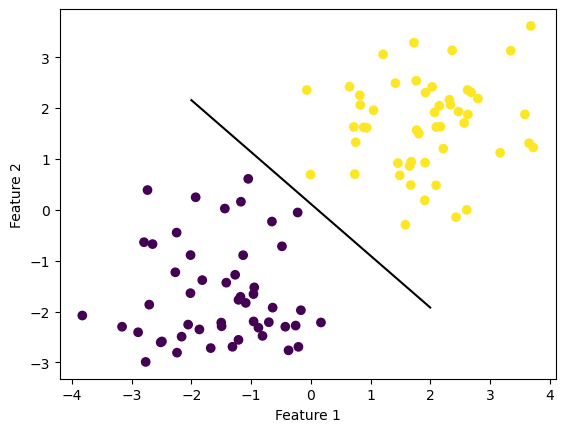

In [14]:
#alpha = 200
fig3 = plt.scatter(X3[:,0], X3[:,1], c = y3)
fig3 = draw_line(LR3.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")
LR3.loss_history
LR3.w


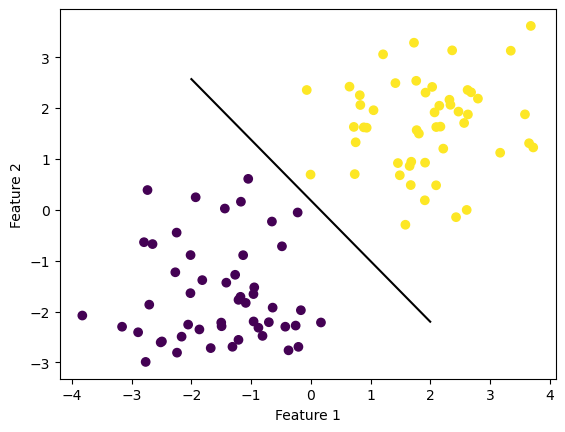

In [15]:
#alpha = .01
fig3 = plt.scatter(X3[:,0], X3[:,1], c = y3)
fig3 = draw_line(LR5.w, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")


array([nan, nan, nan, ..., nan, nan, nan])

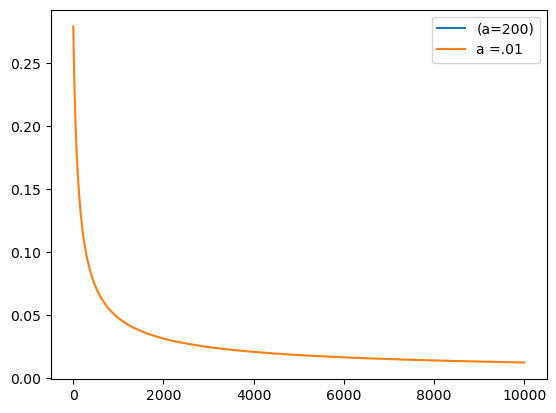

In [17]:

num_steps1 = len(LR3.loss_history)
plt.plot(np.arange(num_steps1) + 1, LR3.loss_history, label = "(a=200)")

num_steps2 = len(LR5.loss_history)
plt.plot(np.arange(num_steps2) + 1, LR5.loss_history, label = "a =.01")




legend = plt.legend() 
LR3.loss_history

We can see that both alphas result in good separators. But, we have discovered one of the caveats of logistic regression. It can combat alphas that are too large by increasing all of the weights. So, for data that is linearly separable the model performs as good as you want it to. Hence, we will now investigate non-linearly separable data


#### Non linearly separable

In [19]:
np.random.seed(8680)

n = 100
p_features = 4

X4, y4 = make_blobs(n_samples = 100, n_features = p_features-1,centers=[(-1,-1),(1,1)])

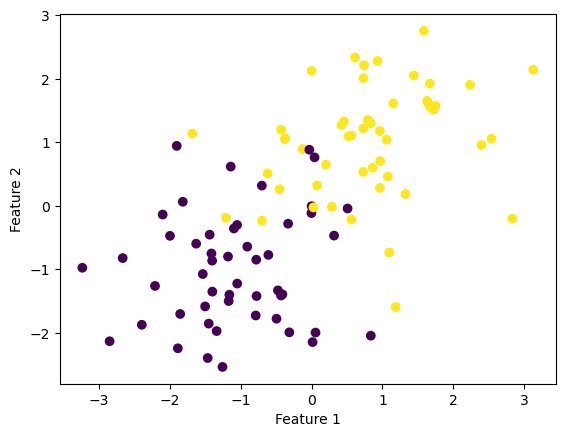

In [20]:

fig1 = plt.scatter(X4[:,0], X4[:,1], c = y4)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

In [21]:
LR6 = LogisticRegression()
LR6.fit(X4, y4, alpha = 100, max_epochs = 10000)

LR7 = LogisticRegression()
LR7.fit(X4, y4, alpha = 1, max_epochs = 10000)



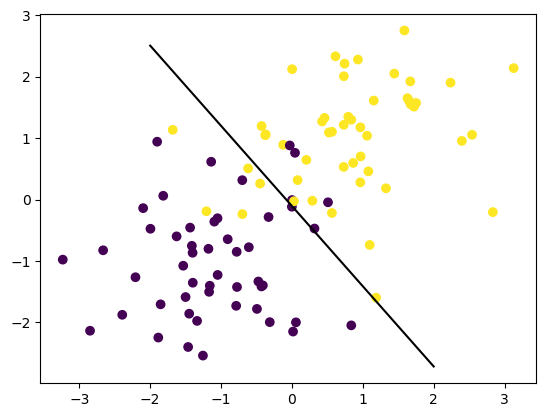

In [22]:
fig3 = plt.scatter(X4[:,0], X4[:,1], c = y4)
fig3 = draw_line(LR6.w, -2, 2)


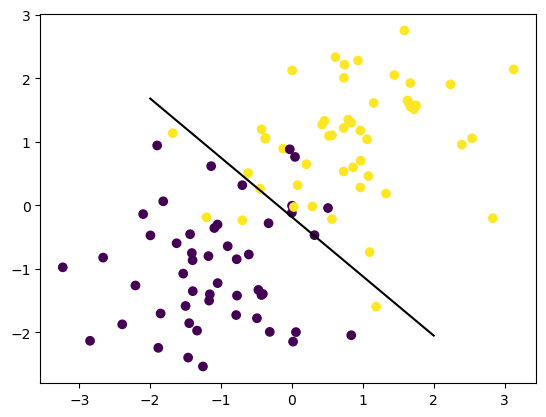

In [23]:
fig3 = plt.scatter(X4[:,0], X4[:,1], c = y4)
fig3 = draw_line(LR7.w, -2, 2)

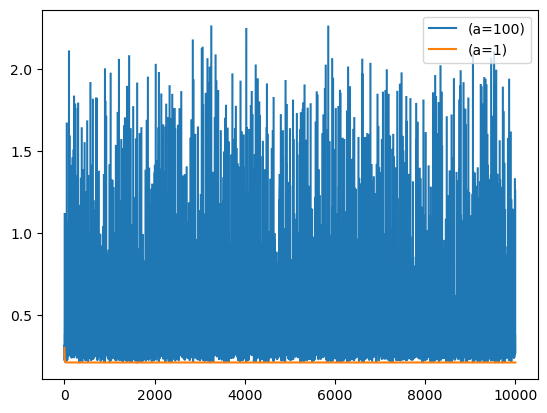

In [24]:

num_steps1 = len(LR6.loss_history)
plt.plot(np.arange(num_steps1) + 1, LR6.loss_history, label = "(a=100)")


num_steps1 = len(LR7.loss_history)
plt.plot(np.arange(num_steps1) + 1, LR7.loss_history, label = "(a=1)")


legend = plt.legend() 

Here we can see that our model performs fairly well at a smaller alpha (1) as the line mostly separates the data. However, for a larger alpha the algorithm does not work well. It is unable to converge and thus results in a bad separater and the loss bounces around 

## Experiment batch size

In [22]:
np.random.seed(8680)

n = 100
p_features = 4

X4, y4 = make_blobs(n_samples = 100, n_features = p_features-1,centers=[(-1.7,-1.7),(1.7,1.7)])

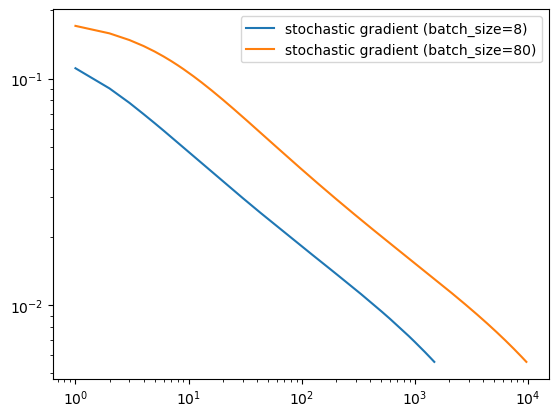

In [31]:
LR = LogisticRegression()
LR.fit_stochastic(X4, y4, 
                  max_epochs = 10000, 
                  batch_size = 8, 
                  alpha = .1) 

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient (batch_size=8)")

LR = LogisticRegression()
LR.fit_stochastic(X4, y4, 
                  max_epochs = 10000, 
                  batch_size = 80, 
                  alpha = .1)

num_steps = len(LR.loss_history)
plt.plot(np.arange(num_steps) + 1, LR.loss_history, label = "stochastic gradient (batch_size=80)")


plt.loglog()

legend = plt.legend() 

For this experiment I compared a stochastic batch size of 8 to a batch size of 80. We can see that a smaller batch size allows the algorithm to converge must faster. Increasing the batch size by a factor of 8 almost increased the number of needed epochs by a factor of 10